#### Step 1: Imports + Load CSV

In [1]:
# EDA_raw_analyst_ratings.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../data/raw/raw_analyst_ratings.csv")

# Display structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


#### Step 2: Descriptive Stats on Headline Text

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


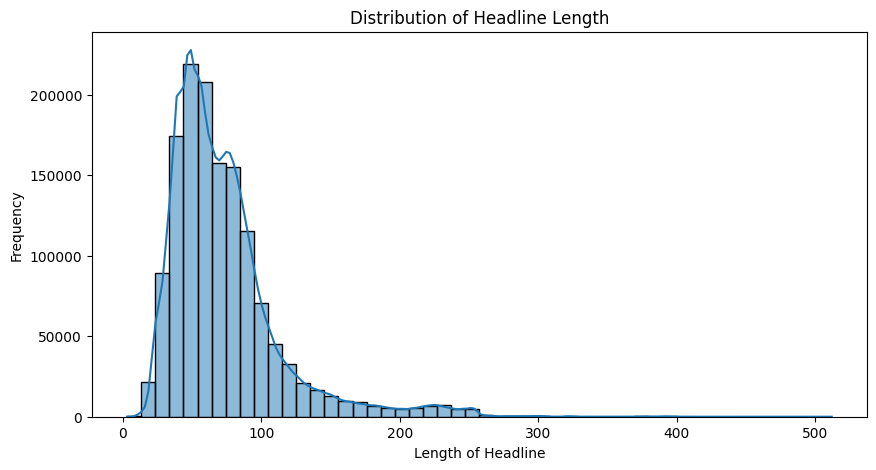

In [2]:
# Length of headline
df['headline_length'] = df['headline'].astype(str).apply(len)

# Basic stats
print(df['headline_length'].describe())

# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(df['headline_length'], bins=50, kde=True)
plt.title("Distribution of Headline Length")
plt.xlabel("Length of Headline")
plt.ylabel("Frequency")
plt.show()


####  Step 3: Publisher Frequency

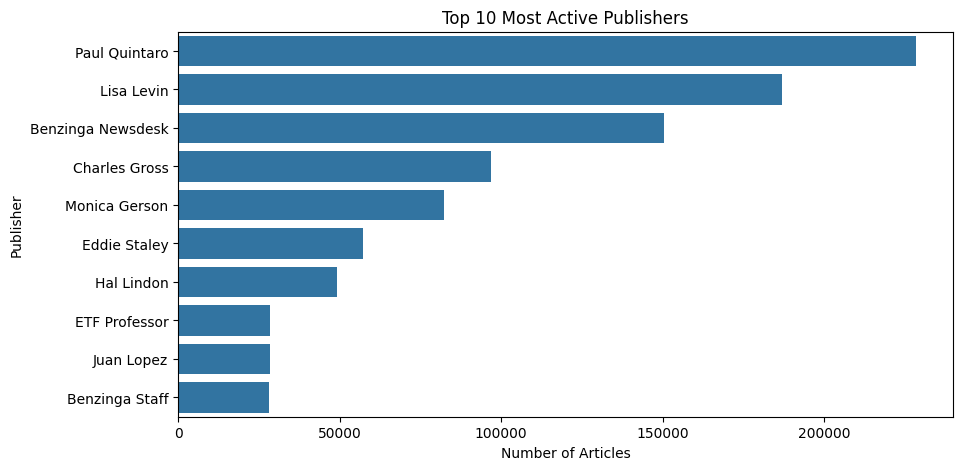

In [3]:
# Top publishers
top_publishers = df['publisher'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title("Top 10 Most Active Publishers")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.show()


#### Step 4: Date Parsing & Trend

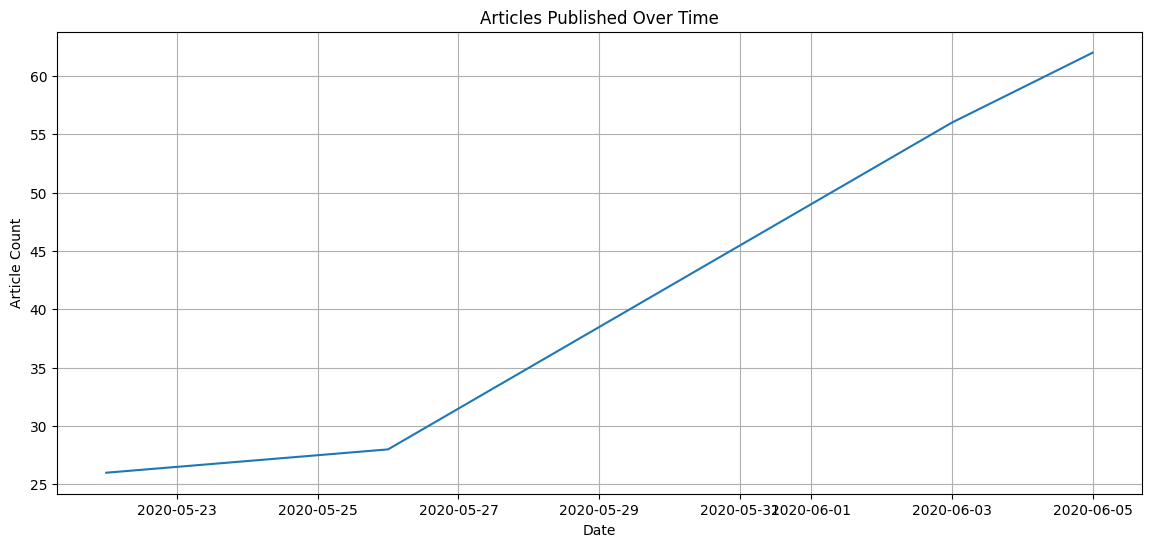

In [10]:
# Convert date with mixed formats
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')
df = df.dropna(subset=['date'])

# Count articles by day (this line was missing!)
daily_articles = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(14,6))
daily_articles.plot()
plt.title("Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.grid(True)
plt.show()

#### Step 5: Publishing Hour Trend

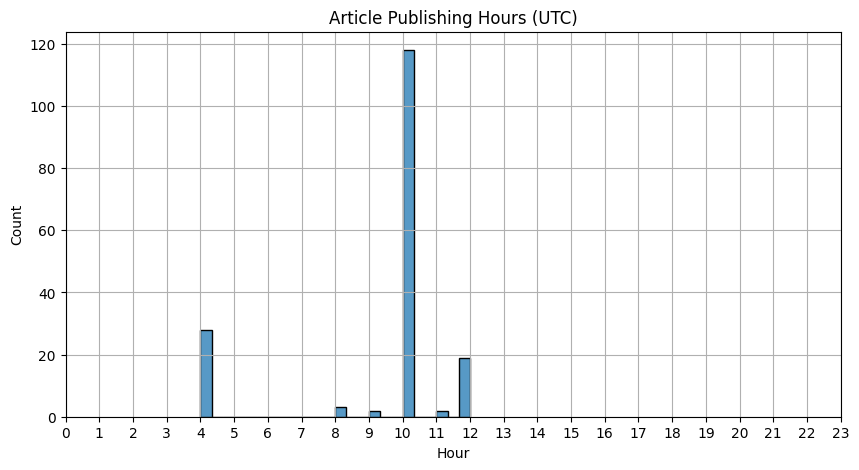

In [11]:
# Parse dates robustly and drop failures
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')
df = df.dropna(subset=['date'])

# Now extract hour
df['hour'] = df['date'].dt.hour

plt.figure(figsize=(10,5))
sns.histplot(df['hour'], bins=24, kde=False)
plt.title("Article Publishing Hours (UTC)")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(range(0, 24))
plt.grid()
plt.show()


#### Step 6: Keywords + WordCloud

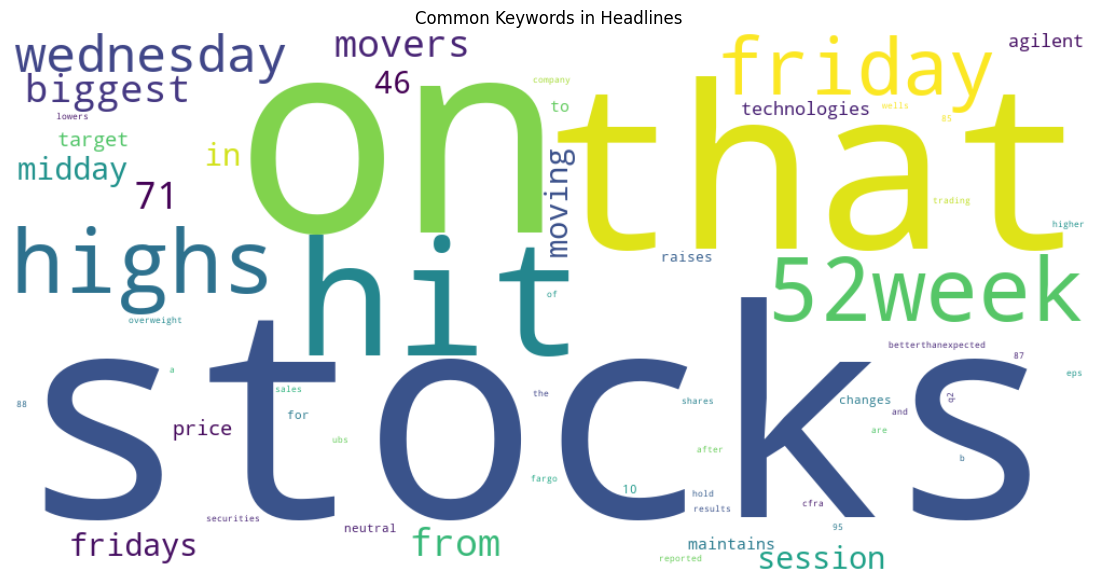

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill NaNs
df['headline'] = df['headline'].fillna('')

# Simple preprocessing
def clean_text(text):
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)
    return text.lower()

df['cleaned_headline'] = df['headline'].apply(clean_text)

# Word frequency
all_words = ' '.join(df['cleaned_headline'].values)
word_freq = Counter(all_words.split())

# WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Keywords in Headlines")
plt.show()


#### Step 7: Optional – Email/Domain Check (Publisher)

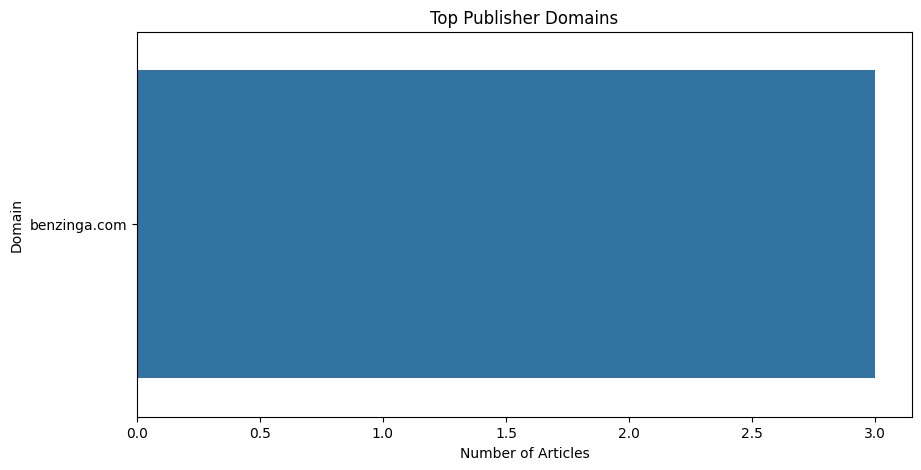

In [13]:
# Check for email-looking publishers
df['publisher_domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else None)

domain_counts = df['publisher_domain'].value_counts().dropna().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=domain_counts.values, y=domain_counts.index)
plt.title("Top Publisher Domains")
plt.xlabel("Number of Articles")
plt.ylabel("Domain")
plt.show()
